In [1]:
# Run in python 3.9
# $ conda activate flagging
from flagging import flag

In [2]:
import pandas as pd

In [3]:
for_flagging = pd.read_csv('for_flagging.csv')
for_flagging

,id,hazard,label,Y
0,0.0,0.015633,0.0,1
1,0.0,0.015414,0.0,1
2,0.0,0.013789,0.0,1
3,0.0,0.015937,0.0,1
4,0.0,0.010537,0.0,1
...,...,...,...,...
151435,1261.0,0.002706,0.0,1
151436,1261.0,0.000769,0.0,1
151437,1261.0,0.000531,0.0,1
151438,1261.0,0.002076,0.0,1


In [70]:
df = for_flagging

In [72]:
df[df.id == 0]

,id,hazard,label,Y,new_id
0,0.0,0.015633,0.0,1,0.0
1,0.0,0.015414,0.0,1,0.0
2,0.0,0.013789,0.0,1,0.0
3,0.0,0.015937,0.0,1,0.0
4,0.0,0.010537,0.0,1,0.0
...,...,...,...,...,...
115,0.0,0.007606,0.0,1,0.0
116,0.0,0.005818,0.0,1,0.0
117,0.0,0.005131,0.0,1,0.0
118,0.0,0.007122,0.0,1,0.0


In [73]:


df['new_id'] = df.index % 120
df

,id,hazard,label,Y,new_id
0,0.0,0.015633,0.0,1,0
1,0.0,0.015414,0.0,1,1
2,0.0,0.013789,0.0,1,2
3,0.0,0.015937,0.0,1,3
4,0.0,0.010537,0.0,1,4
...,...,...,...,...,...
151435,1261.0,0.002706,0.0,1,115
151436,1261.0,0.000769,0.0,1,116
151437,1261.0,0.000531,0.0,1,117
151438,1261.0,0.002076,0.0,1,118


In [101]:
snip = df[df.id == 1261]
s_idx = snip[snip.label == 1].index[0]
print(s_idx)
snip.loc[:s_idx]

151397


,id,hazard,label,Y,new_id
151320,1261.0,0.047419,0.0,1,0
151321,1261.0,0.051151,0.0,1,1
151322,1261.0,0.028536,0.0,1,2
151323,1261.0,0.049466,0.0,1,3
151324,1261.0,0.011827,0.0,1,4
...,...,...,...,...,...
151393,1261.0,0.003758,0.0,1,73
151394,1261.0,0.002887,0.0,1,74
151395,1261.0,0.004067,0.0,1,75
151396,1261.0,0.004241,0.0,1,76


In [121]:
snip = df[df.id == 0]
s_idx = snip[snip.label == 1].shape[0]
s_idx
# s_idx = snip[snip.label == 1].index[0]
# print(s_idx)
# snip.loc[:s_idx]

0

In [105]:
unique_ids

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.259e+03, 1.260e+03,
       1.261e+03])

In [122]:
unique_ids = df.id.unique()
# new = pd.DataFrame(df[df.id == 0])
new = pd.DataFrame()


for curr_id in unique_ids:
    snip = df[df.id == curr_id]
    delta_true = snip[snip.label == 1]
    
    if delta_true.shape[0] == 0:
        new = pd.concat([new, snip])
    else:
        s_idx = delta_true.index[0]
        snip = snip.loc[:s_idx]
        new = pd.concat([new, snip])

In [140]:
new

,id,hazard,label,Y,new_id
0,0.0,0.015633,0.0,1,0
1,0.0,0.015414,0.0,1,1
2,0.0,0.013789,0.0,1,2
3,0.0,0.015937,0.0,1,3
4,0.0,0.010537,0.0,1,4
...,...,...,...,...,...
151393,1261.0,0.003758,0.0,1,73
151394,1261.0,0.002887,0.0,1,74
151395,1261.0,0.004067,0.0,1,75
151396,1261.0,0.004241,0.0,1,76


In [143]:
new.groupby('id').last()

,hazard,label,Y,new_id
id,,,,
0.0,0.007358,0.0,1,119
1.0,0.005800,0.0,1,119
2.0,0.003996,0.0,1,119
3.0,0.007321,0.0,1,119
4.0,0.008495,0.0,1,119
...,...,...,...,...
1257.0,0.007608,0.0,1,119
1258.0,0.006584,0.0,1,119
1259.0,0.008150,0.0,1,119


In [68]:
for_flagging[for_flagging.label == 1]

,id,hazard,label,Y
2792,23.0,0.002452,1.0,1
3390,28.0,0.006001,1.0,1
9977,83.0,0.021825,1.0,1
13708,114.0,0.004828,1.0,1
15521,129.0,0.008641,1.0,1
...,...,...,...,...
140777,1173.0,0.016584,1.0,1
141251,1177.0,0.075578,1.0,1
141639,1180.0,0.000339,1.0,1
145256,1210.0,0.000671,1.0,1


In [50]:
# for_flagging.groupby('id').apply(lambda x: for_flagging.label.any())
label_idxs = for_flagging[for_flagging.label==1].id.values.astype(int)
label_idxs

array([  23,   28,   83,  114,  129,  130,  167,  170,  184,  198,  206,
        225,  242,  245,  266,  267,  284,  291,  295,  325,  336,  337,
        365,  369,  371,  376,  396,  421,  429,  431,  477,  536,  537,
        556,  557,  579,  593,  597,  661,  703,  758,  766,  773,  779,
        782,  811,  815,  822,  833,  850,  870,  875,  897,  911,  912,
        914,  927,  976,  984, 1015, 1045, 1049, 1060, 1063, 1066, 1069,
       1102, 1111, 1169, 1173, 1177, 1180, 1210, 1261])

In [64]:
for_flagging[(for_flagging.id.isin(label_idxs))].groupby('id').apply(lambda x: x.max())

,id,hazard,label,Y
id,,,,
23.0,23.0,0.103443,1.0,1.0
28.0,28.0,0.039078,1.0,1.0
83.0,83.0,0.038973,1.0,1.0
114.0,114.0,0.116489,1.0,1.0
129.0,129.0,0.083538,1.0,1.0
...,...,...,...,...
1173.0,1173.0,0.023470,1.0,1.0
1177.0,1177.0,0.104534,1.0,1.0
1180.0,1180.0,0.128406,1.0,1.0


In [ ]:
np.zeros

In [55]:
for_flagging[for_flagging.label == 1]

,id,hazard,label,Y
2792,23.0,0.002452,1.0,1
3390,28.0,0.006001,1.0,1
9977,83.0,0.021825,1.0,1
13708,114.0,0.004828,1.0,1
15521,129.0,0.008641,1.0,1
...,...,...,...,...
140777,1173.0,0.016584,1.0,1
141251,1177.0,0.075578,1.0,1
141639,1180.0,0.000339,1.0,1
145256,1210.0,0.000671,1.0,1


In [27]:
for_flagging.label.sum()

74.0

In [52]:
results_2 = flag(for_flagging['id'].values, for_flagging['label'].values, for_flagging['Y'].values, for_flagging['hazard'].values, 1)

100%|██████████| 1262/1262 [00:01<00:00, 1238.24it/s]


In [54]:
results_2['label'].sum()

0

### New results

In [129]:
new_results = flag(new['id'].values, new['label'].values, new['Y'].values, new['hazard'].values, 1)

100%|██████████| 1262/1262 [00:01<00:00, 1236.80it/s]


In [131]:
new_results['label'].sum()

74

In [137]:
ncomm_dict

{'DDH': {-0.9999980859122: array([1, 1, 1, ..., 1, 1, 1]),
  0.0: array([1, 1, 1, ..., 1, 1, 1]),
  0.001: array([1, 1, 1, ..., 1, 1, 1]),
  0.002: array([1, 1, 1, ..., 1, 1, 1]),
  0.003: array([1, 1, 1, ..., 1, 1, 1]),
  0.004: array([1, 1, 1, ..., 1, 1, 1]),
  0.005: array([1, 1, 1, ..., 1, 1, 1]),
  0.006: array([1, 1, 1, ..., 1, 1, 1]),
  0.007: array([1, 1, 1, ..., 1, 1, 1]),
  0.008: array([1, 1, 1, ..., 1, 1, 1]),
  0.009: array([1, 1, 1, ..., 1, 1, 1]),
  0.01: array([1, 1, 1, ..., 1, 1, 1]),
  0.011: array([1, 1, 1, ..., 1, 1, 1]),
  0.012: array([1, 1, 1, ..., 1, 1, 1]),
  0.013: array([1, 1, 1, ..., 1, 1, 1]),
  0.014: array([1, 1, 1, ..., 0, 1, 1]),
  0.015: array([1, 1, 1, ..., 0, 1, 1]),
  0.016: array([1, 1, 1, ..., 0, 1, 1]),
  0.017: array([1, 1, 1, ..., 0, 1, 1]),
  0.018: array([0, 1, 1, ..., 0, 0, 1]),
  0.019: array([0, 1, 1, ..., 0, 0, 1]),
  0.02: array([0, 1, 1, ..., 0, 0, 1]),
  0.021: array([0, 1, 1, ..., 0, 0, 1]),
  0.022: array([0, 1, 1, ..., 0, 0, 1]),
  

In [139]:
ncomm_dict["DDH"]["label"].sum()

74

In [133]:
from flagging import ROC_PR
ncomm_dict = {"DDH": new_results}
ROC_PR(ncomm_dict, ["DDH"])

['DDH']
DDH


([{'fpr': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 8.41750822e-04, 8.41750822e-04,
          8.41750822e-04, 1.68350164e-03, 1.68350164e-03, 1.68350164e-03,
          1.68350164e-03, 1.68350164e-03, 1.68350164e-03, 1.68350164e-03,
          2.52525252e-03, 2.52525252e-03, 2.52525252e-03, 2.52525252e-03,
          2.52525252e-03, 2.52525252e-03, 2.52525252e-03, 2.52525252e-03,
          2.52525252e-03, 2.52525252e-03, 2.52525252e-03, 2.52525252e-03,
          3.36700329e-03, 3.36700329e-03, 4.20875428e-03, 4.20875428e-03,
          5.05050505e-03, 5.05050505e-03, 5.05050505e-03, 5.05050505e-03,
          5.05050505e-03, 5.05050505e-03, 6.73400657e-03, 9.25925933e-03,
          9.25925933e-03, 9.25925933e-03, 1.01010101e-02, 1.01010101e-02,
          1.01010101e-02, 1.09427609e-02, 1.09427609e-02, 1.17845116e-02,
          1.17845116e-02, 1.17845116e-02, 1.17845116e-02, 1.17845116e-02,
          1.34680131e-02, 1.346

In [145]:
from _utils import run_as_Ps, ROC_PR, dump_pickle, load_pickle, save_PR_plot, save_ROC_plot, email_when_done

['DDH']
DDH


FileNotFoundError: [Errno 2] No such file or directory: './rslts/__ROC.png'

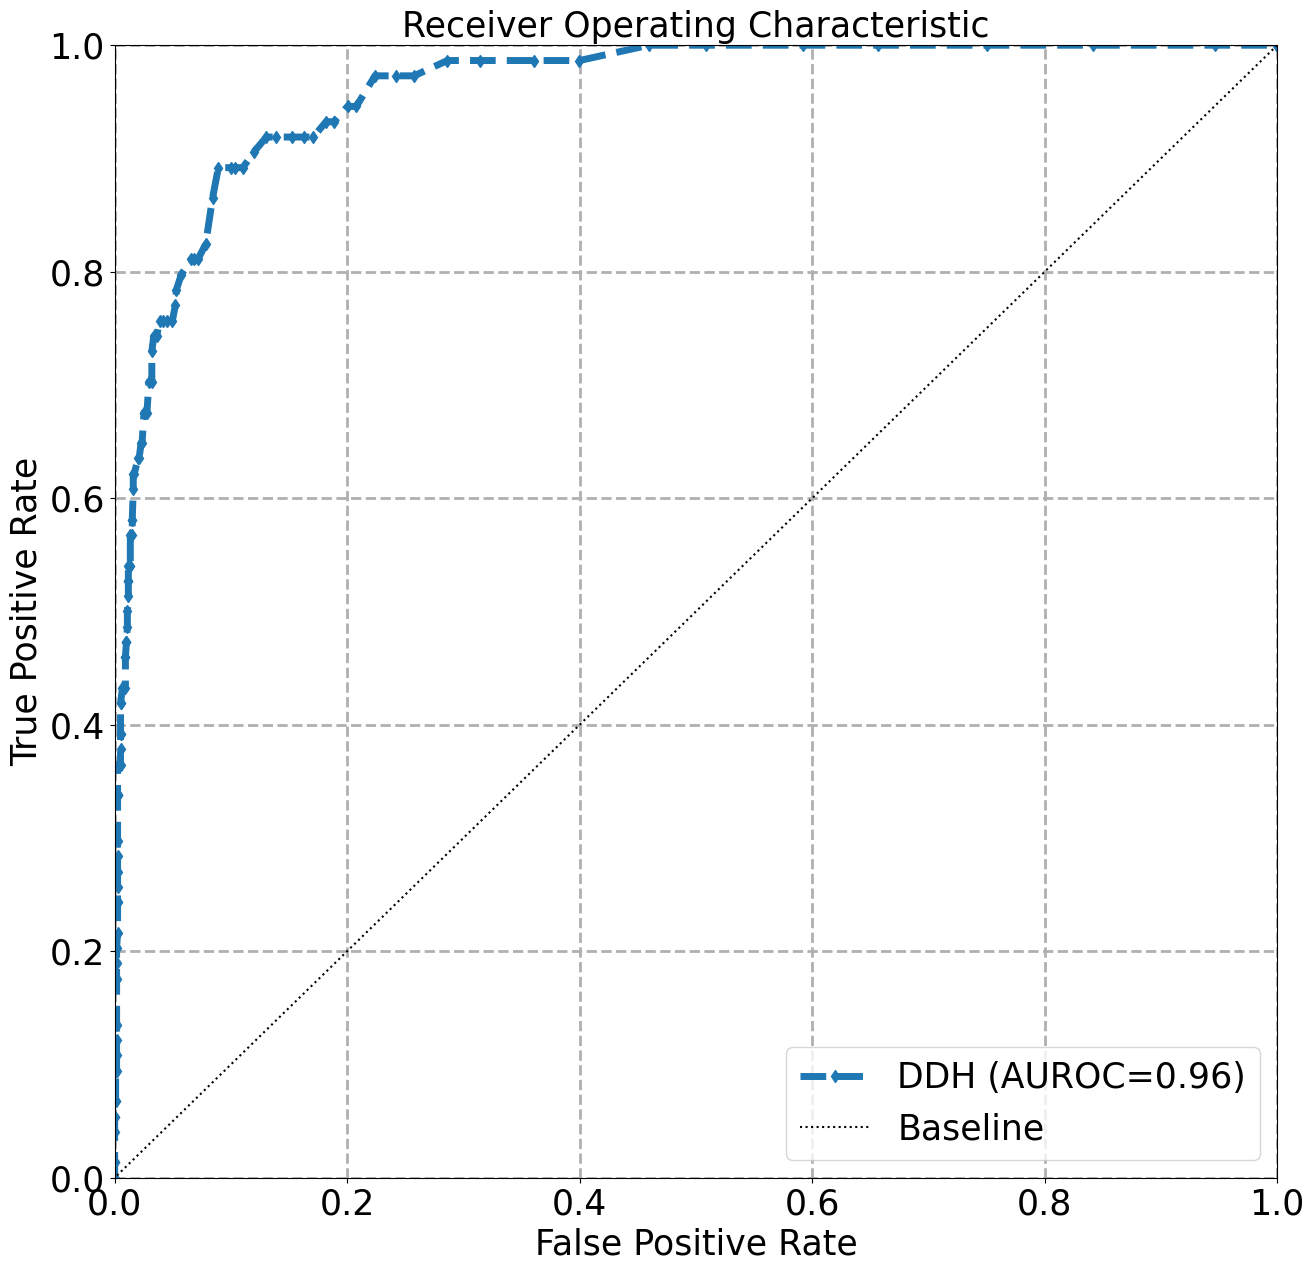

In [147]:

roc, pr = ROC_PR(ncomm_dict, ["DDH"])

save_ROC_plot(roc, f"./rslts/{'_'}_ROC.png", fontsize=25, figsize=(15, 15), dpi=100)
save_PR_plot (pr,  f"./rslts/{'_'}_PR.png" , fontsize=25, figsize=(15, 15), dpi=100)

### End new results

In [5]:
results

{-0.99999990918026: array([1, 1, 1, ..., 1, 1, 1]),
 0.0: array([1, 1, 1, ..., 1, 1, 1]),
 0.001: array([1, 1, 1, ..., 1, 1, 1]),
 0.002: array([1, 1, 1, ..., 1, 1, 1]),
 0.003: array([1, 1, 1, ..., 1, 1, 1]),
 0.004: array([1, 1, 1, ..., 1, 1, 1]),
 0.005: array([1, 1, 1, ..., 1, 1, 1]),
 0.006: array([1, 1, 1, ..., 1, 1, 1]),
 0.007: array([1, 1, 1, ..., 1, 1, 1]),
 0.008: array([1, 1, 1, ..., 1, 1, 1]),
 0.009: array([1, 1, 1, ..., 1, 1, 1]),
 0.01: array([1, 1, 1, ..., 1, 1, 1]),
 0.011: array([1, 1, 1, ..., 1, 1, 1]),
 0.012: array([1, 1, 1, ..., 1, 1, 1]),
 0.013: array([1, 1, 1, ..., 1, 1, 1]),
 0.014: array([1, 1, 1, ..., 0, 1, 1]),
 0.015: array([1, 1, 1, ..., 0, 1, 1]),
 0.016: array([1, 1, 1, ..., 0, 1, 1]),
 0.017: array([1, 1, 1, ..., 0, 1, 1]),
 0.018: array([0, 1, 1, ..., 0, 0, 1]),
 0.019: array([0, 1, 1, ..., 0, 0, 1]),
 0.02: array([0, 1, 1, ..., 0, 0, 1]),
 0.021: array([0, 1, 1, ..., 0, 0, 1]),
 0.022: array([0, 1, 1, ..., 0, 0, 1]),
 0.023: array([0, 1, 1, ..., 0, 

In [136]:
results["label"].sum()

74.0

In [6]:
results['label'].shape

(1262,)

In [32]:
for_flagging["label"].values.

74.0

In [33]:
comm_dict = {"DDH": results}
comm_dict["DDH"]["label"] = for_flagging["label"].values
comm_dict

{'DDH': {-0.99999990918026: array([1, 1, 1, ..., 1, 1, 1]),
  0.0: array([1, 1, 1, ..., 1, 1, 1]),
  0.001: array([1, 1, 1, ..., 1, 1, 1]),
  0.002: array([1, 1, 1, ..., 1, 1, 1]),
  0.003: array([1, 1, 1, ..., 1, 1, 1]),
  0.004: array([1, 1, 1, ..., 1, 1, 1]),
  0.005: array([1, 1, 1, ..., 1, 1, 1]),
  0.006: array([1, 1, 1, ..., 1, 1, 1]),
  0.007: array([1, 1, 1, ..., 1, 1, 1]),
  0.008: array([1, 1, 1, ..., 1, 1, 1]),
  0.009: array([1, 1, 1, ..., 1, 1, 1]),
  0.01: array([1, 1, 1, ..., 1, 1, 1]),
  0.011: array([1, 1, 1, ..., 1, 1, 1]),
  0.012: array([1, 1, 1, ..., 1, 1, 1]),
  0.013: array([1, 1, 1, ..., 1, 1, 1]),
  0.014: array([1, 1, 1, ..., 0, 1, 1]),
  0.015: array([1, 1, 1, ..., 0, 1, 1]),
  0.016: array([1, 1, 1, ..., 0, 1, 1]),
  0.017: array([1, 1, 1, ..., 0, 1, 1]),
  0.018: array([0, 1, 1, ..., 0, 0, 1]),
  0.019: array([0, 1, 1, ..., 0, 0, 1]),
  0.02: array([0, 1, 1, ..., 0, 0, 1]),
  0.021: array([0, 1, 1, ..., 0, 0, 1]),
  0.022: array([0, 1, 1, ..., 0, 0, 1]),
 

In [34]:
comm_dict['DDH']['label'].sum()
# comm_dict['DDH'][.14].shape

74.0

In [8]:
from flagging import ROC_PR
# comm_dict = {"DDH": results}
ROC_PR(["DDH"], comm_dict)

{'DDH': {-0.99999990918026: array([1, 1, 1, ..., 1, 1, 1]), 0.0: array([1, 1, 1, ..., 1, 1, 1]), 0.001: array([1, 1, 1, ..., 1, 1, 1]), 0.002: array([1, 1, 1, ..., 1, 1, 1]), 0.003: array([1, 1, 1, ..., 1, 1, 1]), 0.004: array([1, 1, 1, ..., 1, 1, 1]), 0.005: array([1, 1, 1, ..., 1, 1, 1]), 0.006: array([1, 1, 1, ..., 1, 1, 1]), 0.007: array([1, 1, 1, ..., 1, 1, 1]), 0.008: array([1, 1, 1, ..., 1, 1, 1]), 0.009: array([1, 1, 1, ..., 1, 1, 1]), 0.01: array([1, 1, 1, ..., 1, 1, 1]), 0.011: array([1, 1, 1, ..., 1, 1, 1]), 0.012: array([1, 1, 1, ..., 1, 1, 1]), 0.013: array([1, 1, 1, ..., 1, 1, 1]), 0.014: array([1, 1, 1, ..., 0, 1, 1]), 0.015: array([1, 1, 1, ..., 0, 1, 1]), 0.016: array([1, 1, 1, ..., 0, 1, 1]), 0.017: array([1, 1, 1, ..., 0, 1, 1]), 0.018: array([0, 1, 1, ..., 0, 0, 1]), 0.019: array([0, 1, 1, ..., 0, 0, 1]), 0.02: array([0, 1, 1, ..., 0, 0, 1]), 0.021: array([0, 1, 1, ..., 0, 0, 1]), 0.022: array([0, 1, 1, ..., 0, 0, 1]), 0.023: array([0, 1, 1, ..., 0, 0, 1]), 0.024: a

TypeError: list indices must be integers or slices, not str

In [22]:
comm_dict['DDH']['label']

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
import flagging
roc, pr = flagging.ROC_PR(comm_dict, ["DDH"])

['DDH']
DDH


ValueError: shapes (1262,) and (151440,) not aligned: 1262 (dim 0) != 151440 (dim 0)

In [15]:
roc

[{'fpr': array([0.00000000e+00, 7.92393053e-04, 7.92393053e-04, 2.37717899e-03,
         3.16957221e-03, 3.16957221e-03, 4.75435797e-03, 4.75435797e-03,
         6.33914443e-03, 7.13153742e-03, 7.92392995e-03, 8.71632341e-03,
         9.50871594e-03, 1.18858954e-02, 1.26782889e-02, 1.34706814e-02,
         1.50554674e-02, 1.66402534e-02, 1.66402534e-02, 1.74326468e-02,
         1.82250403e-02, 1.90174319e-02, 1.98098253e-02, 2.21870039e-02,
         2.21870039e-02, 2.21870039e-02, 2.21870039e-02, 2.45641842e-02,
         2.53565777e-02, 2.53565777e-02, 2.61489693e-02, 2.69413628e-02,
         2.69413628e-02, 2.77337562e-02, 2.85261497e-02, 2.93185413e-02,
         2.93185413e-02, 3.09033282e-02, 3.09033282e-02, 3.32805067e-02,
         3.56576853e-02, 3.72424722e-02, 3.72424722e-02, 3.88272591e-02,
         3.88272591e-02, 3.88272591e-02, 4.04120460e-02, 4.12044376e-02,
         4.27892245e-02, 4.35816161e-02, 4.35816161e-02, 4.35816161e-02,
         4.43740077e-02, 4.59587947e-02, 4.5

In [14]:
pr

[{'precision': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.], dtype=float32),
  'recall': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,